In [ ]:
From here:
    
http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gp_regression.html

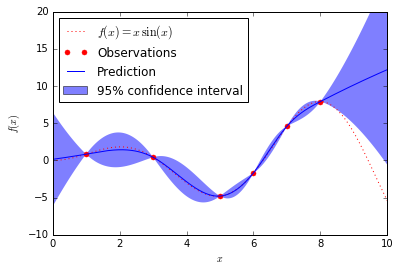

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as pl
%matplotlib inline

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1e-1,
                     random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.plot(X, y, 'r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

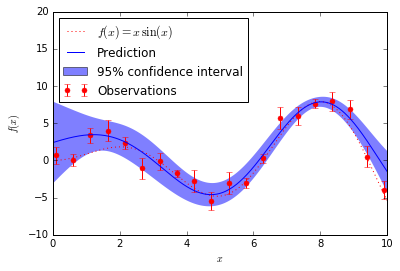

In [2]:
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     nugget=(dy / y) ** 2,
                     random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

In [3]:
y

array([ 0.6600781 ,  0.01658599,  3.38318977,  3.98270044,  2.33109799,
       -1.07400318, -0.10219039, -1.76046019, -2.75786822, -5.44914351,
       -2.99888787, -3.02326263,  0.27263901,  5.69657133,  6.02073355,
        7.64278218,  7.9476799 ,  6.8639604 ,  0.47873466, -3.95626169])

In [4]:
dy

array([ 1.11714491,  0.8266449 ,  1.0270581 ,  1.3859421 ,  0.85726976,
        1.40853515,  1.12336012,  0.51582124,  1.42943723,  1.19089692,
        1.49732285,  0.67234051,  0.63713575,  1.43259546,  1.19681816,
        0.56600017,  1.25546305,  1.25387619,  1.42302454,  1.21152476])

In [5]:
X

array([[ 0.1       ],
       [ 0.61578947],
       [ 1.13157895],
       [ 1.64736842],
       [ 2.16315789],
       [ 2.67894737],
       [ 3.19473684],
       [ 3.71052632],
       [ 4.22631579],
       [ 4.74210526],
       [ 5.25789474],
       [ 5.77368421],
       [ 6.28947368],
       [ 6.80526316],
       [ 7.32105263],
       [ 7.83684211],
       [ 8.35263158],
       [ 8.86842105],
       [ 9.38421053],
       [ 9.9       ]])